# Customer Personality Analysis

**Customer Personality Analysis is a detailed analysis of a company's ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.**

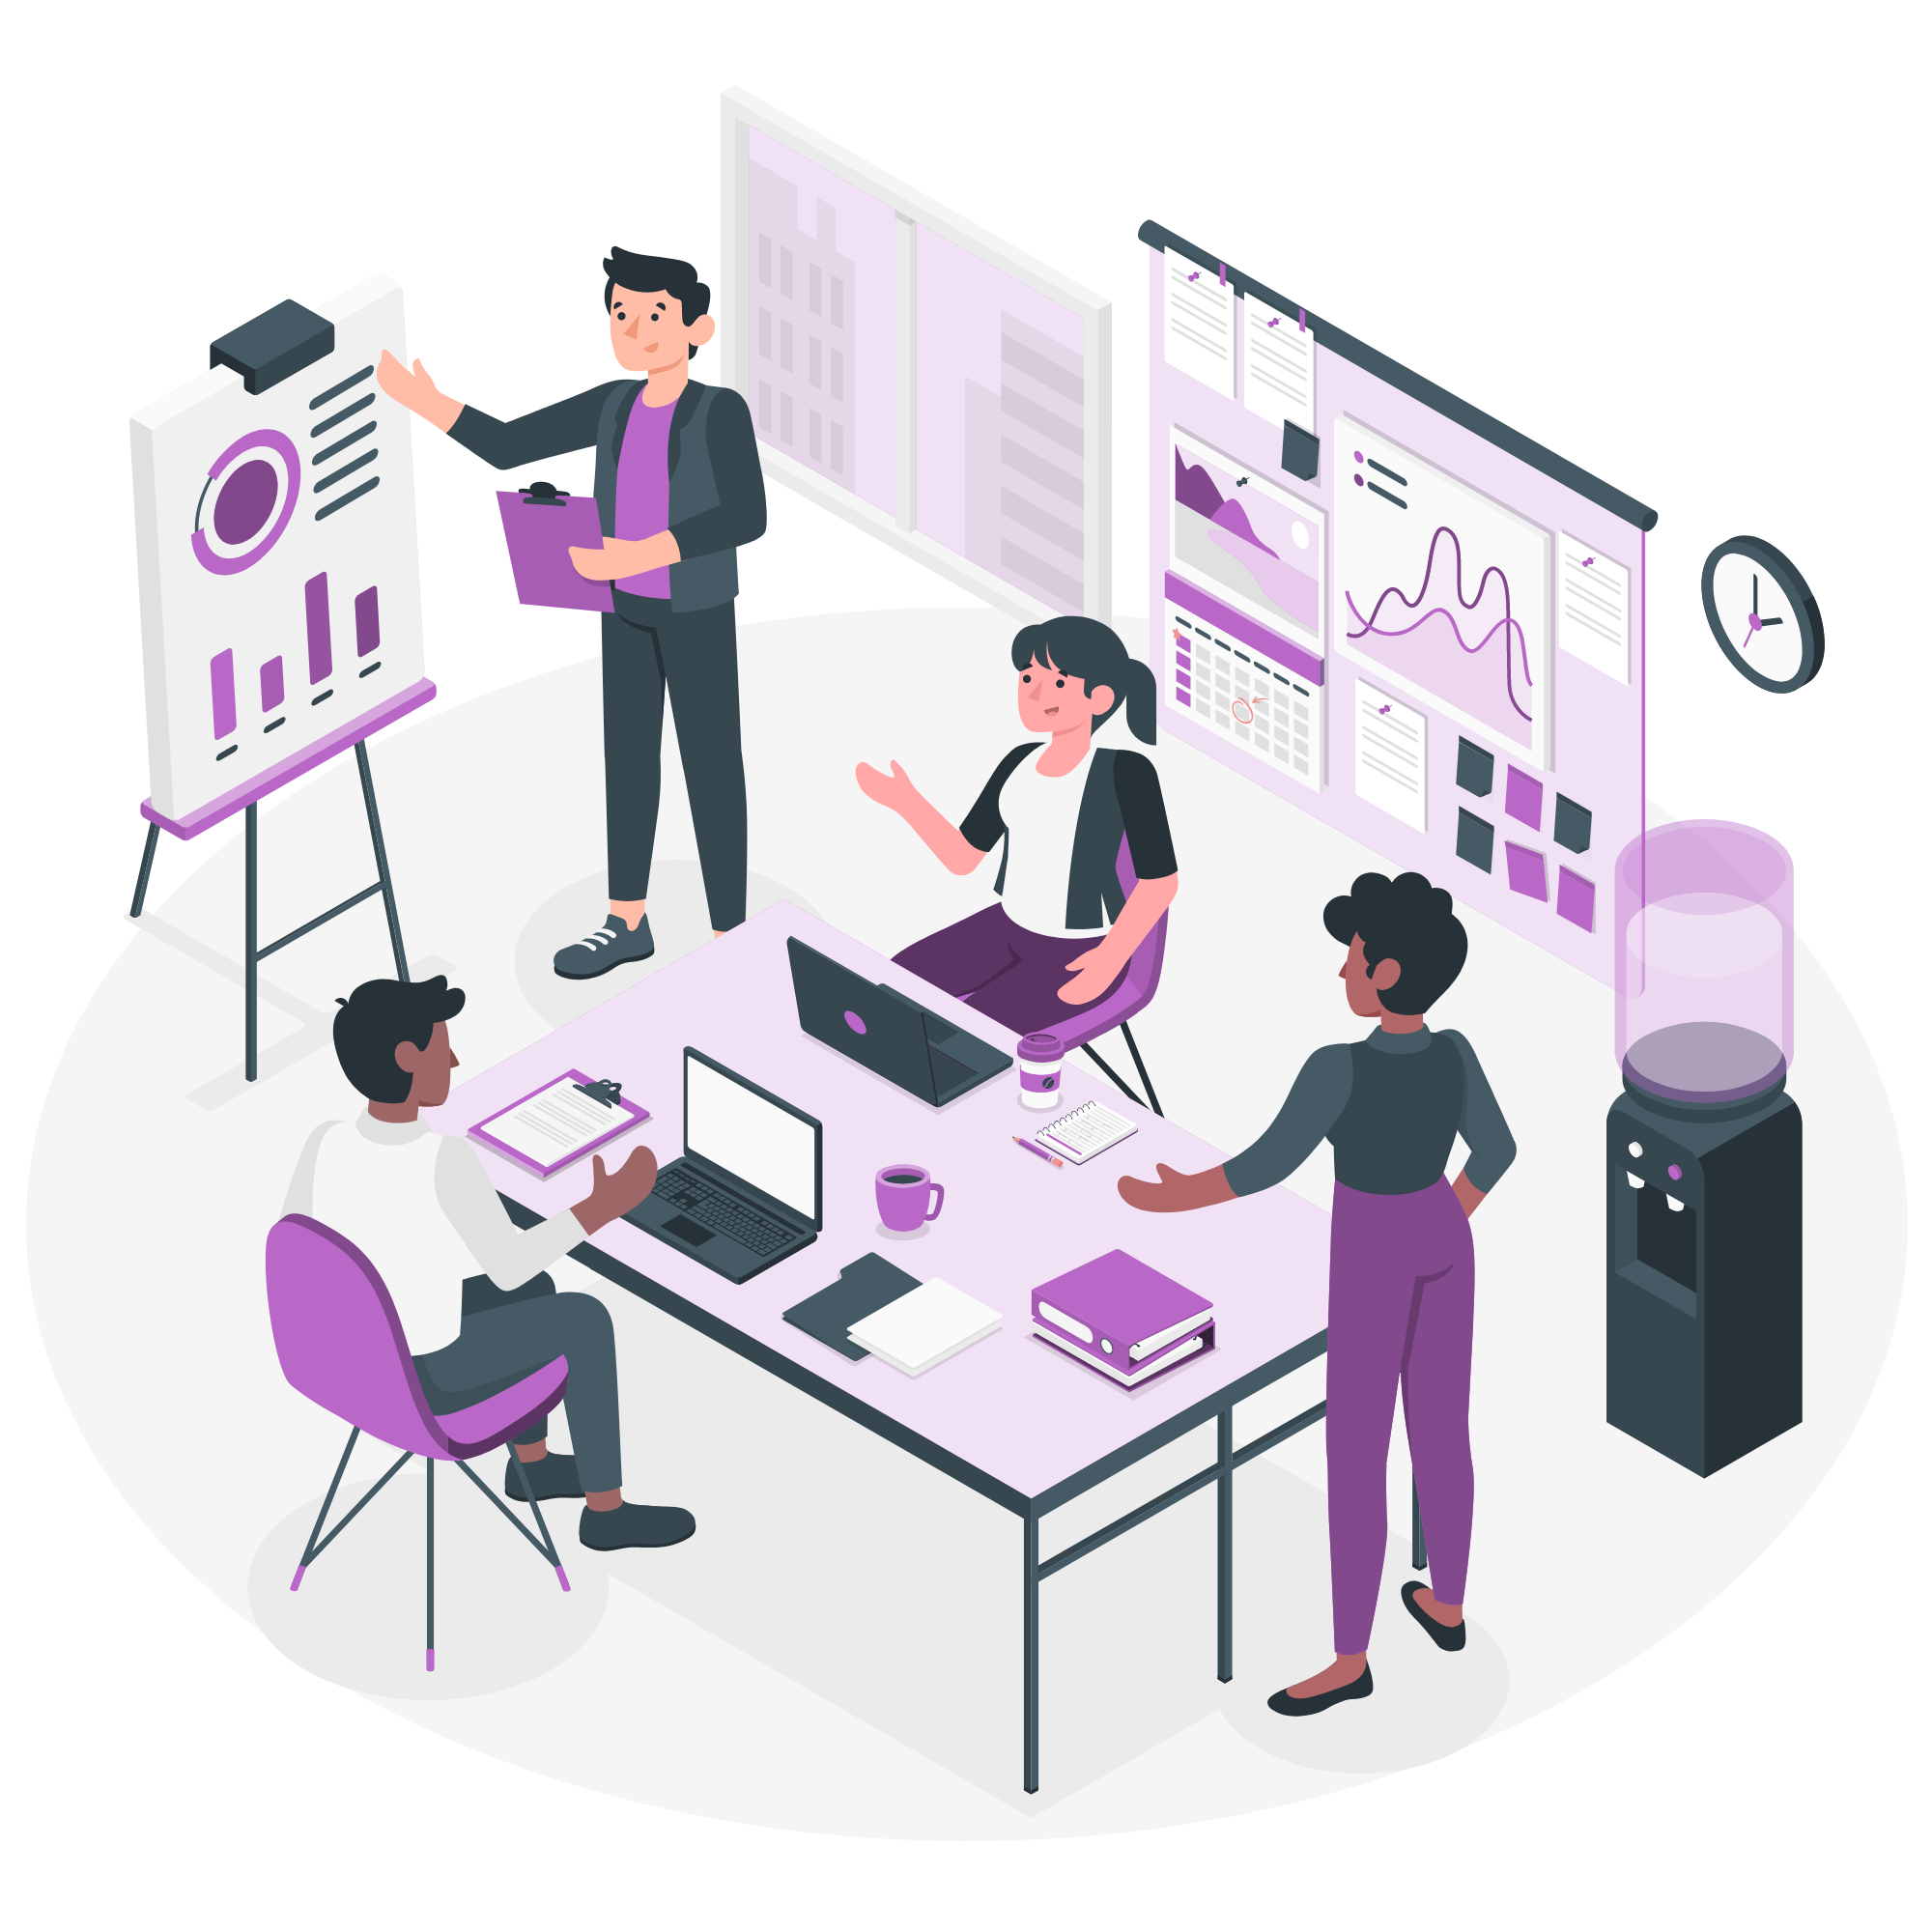

<code style="background:yellow;color:black">About the dataset.</code>


<code style="background:yellow;color:black">Attributes.</code>

People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month


<code style="background:yellow;color:black">*Referencing this Article for insights frequently*</code>

[Click here](https://medium.com/@atulsinghp007/customer-segmentation-in-python-using-rfm-analysis-909981833e03)


----

## Objective:

<code style="background:yellow;color:black">Perform clustering to summarize customer segments.</code>

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(18,13)})
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from datetime import datetime, date
from mpl_toolkits.mplot3d import Axes3D # 3d plot

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.preprocessing import LabelEncoder # Turn cat into numeric features

### Read in the file

In [2]:
data = pd.read_csv('marketing_campaign.csv',sep= '\t')

In [3]:
# Sets option to have all columns viewable
pd.options.display.max_columns = None

#### Make a copy of the data 

In [4]:
# Incase I run into trouble and need to revert back
df = data.copy()

### Examine the data

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)


<code style="background:yellow;color:black">2240 rows and 20 columns</code>

In [7]:
# Info about dataset - including any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# Summary statistics of dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Data Cleaning

In [9]:
# Drop two columns
# Documentation said these were not relevant
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [10]:
# Change the two columns into 'categorical' type
for col in ['Education', 'Marital_Status']:
    df[col]= df[col].astype('category')

# Changing 'Dt_Customer' and 'Year_Birth' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Birth'] = pd.to_datetime(df.Year_Birth, format='%Y').apply(lambda x: x.strftime('%Y'))

In [11]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: object

In [12]:
# Average value of 'Income'
df['Income'].mean()

52247.25135379061

In [13]:
# Look at only column missing data 'Income'
# Create variable and pass pd.isnull() through

In [14]:
missing_data = pd.isnull(df['Income'])

In [15]:
# Display all missing income values
df[missing_data]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [16]:
# Looking at the data, their is no column for employement
# Also, education and number of children seems to be all over the place
# This seems random and with only 24 rows it might be best to drop them.

In [17]:
# dropping all rows that contain NAN
df.dropna(inplace=True)

In [18]:
# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   object        
 2   Education            2216 non-null   category      
 3   Marital_Status       2216 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

#### Change the Income column from float to int

In [19]:
df = df.astype({"Income":int})

#### Removing Outliers

In [20]:
# Appears to be an outliar in the Income columns

minIncome = df['Income'].min()  
maxIncome = df['Income'].max()

print('The minimal salary is ',minIncome)
print('The max salary is ',maxIncome)

The minimal salary is  1730
The max salary is  666666


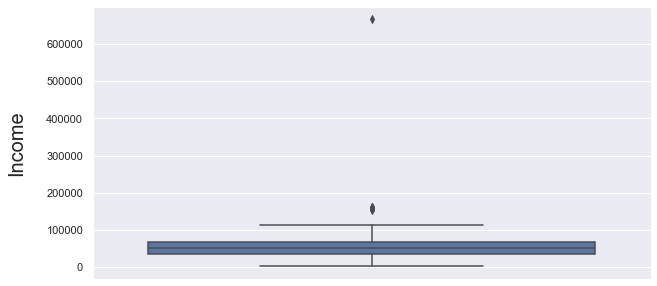

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Income'])
plt.ylabel('Income', fontsize=20, labelpad=20)
plt.show()

In [22]:
# Appears to be the one only 600K income so we will drop that one.
money_outlier = df[df['Income'] > 600000]

df = df.drop(money_outlier.index, axis=0)

In [23]:
# Looks through Year_Date for outliers

# Get overall stats on column
df['Year_Birth'].describe()

count     2215
unique      59
top       1976
freq        89
Name: Year_Birth, dtype: object

In [24]:
df.shape

(2215, 27)

## Data Preprocessing

In [25]:
# Rename columns in Education
df['Education'].replace({'2n Cycle': 'Graduate', 'Basic': 'High School', 'Graduation': 'Bachelors',
                          'Master': 'Masters'}, inplace=True)

In [26]:
# Get a total count of each valye
df['Education'].value_counts()

Bachelors      1115
PhD             481
Masters         365
Graduate        200
High School      54
Name: Education, dtype: int64

In [27]:
# Put into a variable for plotting
eduPlot = df['Education'].value_counts()

In [28]:
# Appears to be an outliar in the Income columns

minIncome = df['Income'].min()  
maxIncome = df['Income'].max()

print('The minimal salary is ',minIncome)
print('The max salary is ',maxIncome)

The minimal salary is  1730
The max salary is  162397


Text(0, 0.5, 'Income')

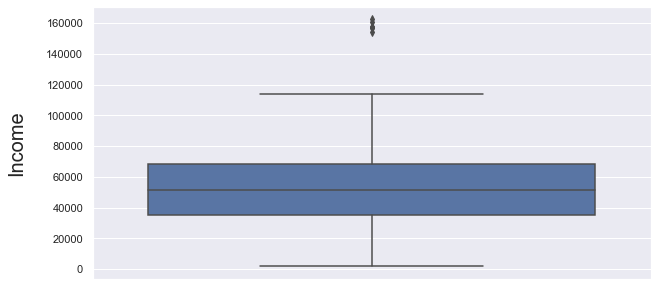

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Income'])
plt.ylabel('Income', fontsize=20, labelpad=20)

In [30]:
# Appears to be the one only 600K income so we will drop that one.
money_outlier = df[df['Income'] > 600000]

df = df.drop(money_outlier.index, axis=0)

---

In [31]:
# Looks through Year_Date for outliers

# Get overall stats on column
df['Year_Birth'].describe()

count     2215
unique      59
top       1976
freq        89
Name: Year_Birth, dtype: object

In [32]:
# Check the min and max
df['Year_Birth'].min()

'1893'

In [33]:
# This looks suspicous ^^^^

df['Year_Birth'].max()

# This seems legit ^^^

'1996'

Probably somebody almost 130 is not going to this store. Lets filter some ages and assume anyone born before 1930 is going to this grocery store

In [34]:
age_outlier = df.loc[df['Year_Birth']<'1930']

In [35]:
# This will drop any customers born before 1930 and update dataset
df = df.drop(age_outlier.index, axis=0)

---

### Create columns for:

    1. Age of customer (use the birth column)
    2. Total number of purchases
    3. If customer is a parent

##### Create an Age columns from Year_Birth

In [36]:
# function to create Age column based on 'Year_Birth'
def age(born):
    born = datetime.strptime(born, "%Y").date()
    today = date.today()
    return today.year - born.year
df['Age'] = df['Year_Birth'].apply(age)


##### Plot histogram of Ages

<AxesSubplot:xlabel='Age', ylabel='Count'>

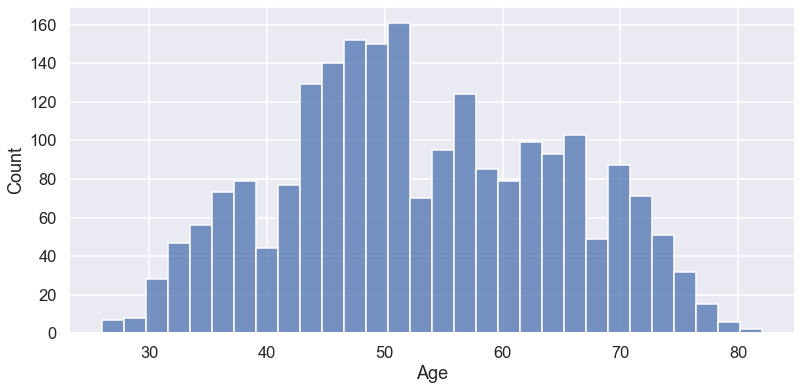

In [37]:
plt.figure(figsize=(13,6))
sns.set_context('talk')
sns.histplot(data=df, x='Age', bins=30)

---

#### Create new column if customer is a parent

0 ---> No

1 ---> Yes

In [38]:
df['Kidhome'].value_counts()

0    1281
1     885
2      46
Name: Kidhome, dtype: int64

In [39]:
df['Teenhome'].value_counts()

0    1144
1    1017
2      51
Name: Teenhome, dtype: int64

In [40]:
def newcolumn(row):
    if row['Kidhome'] >= 1:
        return 1
    elif row['Teenhome'] >=1:
        return 1
    else:
        return 0  

In [41]:
df['Parent'] = df.apply(lambda row: newcolumn(row), axis=1)

---

### Create a column of TotalPurchases and have it a combination of any purchase column totals

In [42]:
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

---

### Rename values in the 'Martial_Status' column

In [43]:
df['Marital_Status'].unique()

['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']

Looks like theres an opportunity to consoldate some of these values in 'Martial_Status':
    
    ***Change so status is either single or in a relationship***
  

In [44]:
df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single',
                             'Together': 'In a relationship', 'Widow':'Single', 'Divorced': 'Single',
                             'Married':'In a relationship'}, inplace=True)

In [45]:
martial_stats = df['Marital_Status'].value_counts()

In [46]:
# Number of single customers vs in a relationship
martial_stats

In a relationship    1428
Single                784
Name: Marital_Status, dtype: int64

Here is a pie graph of the relevant Martial Status


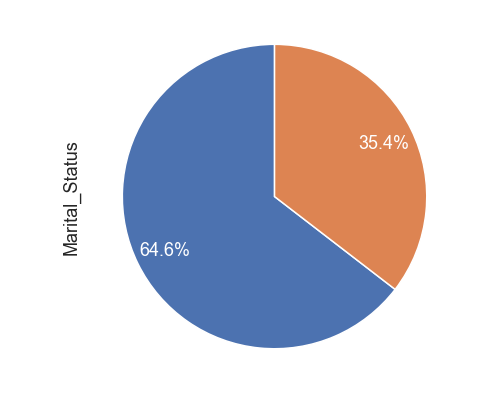

In [47]:
sns.set_context('talk')
plot = martial_stats.plot.pie(autopct='%1.1f%%',pctdistance=0.8,startangle=90,
                              figsize=(12,7), textprops={'color':"w"})

print("Here is a pie graph of the relevant Martial Status")

#### Rename values in MntWines, MntFruits, MntMeatProducts etc

In [48]:
## Rename values
df.rename(columns={'MntWines': 'Wines', 'MntFruits':'Fruits',
                   'MntMeatProducts':'Meat', 'MntFishProducts':'Fish',
                   'MntSweetProducts':'Sweets','MntGoldProds':'Gold'},inplace=True)

In [49]:
# Verify
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases
0,5524,1957,Bachelors,Single,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,22
1,2174,1954,Bachelors,Single,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,1,4


---

In [50]:
# Combine all purchases cost into one Totals column
sumTotal = df['Wines'] + df['Sweets'] + df['Meat'] + df['Gold'] + df['Fruits'] + df['Fish']

In [51]:
df['TotalExpenses'] = sumTotal

----

### Using the corr() method

In [52]:
correlations = df.corr()

In [53]:
# This will display a dataframe but will probably be tough to read
df.corr()

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases,TotalExpenses
ID,1.000000,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,-0.004381,-0.008013,-0.040849,-0.017232,-0.000404,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,0.031839,-0.021112,-0.005086,-0.001764,-0.012016,-0.014327
Income,0.000905,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,-0.027900,0.161387,0.199977,-0.403132,0.742691,0.792740
Kidhome,0.000971,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,0.037067,-0.077901,-0.237497,0.520355,-0.573144,-0.557949
Teenhome,-0.003508,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,0.007746,-0.154402,0.361932,0.587993,0.038248,-0.137964
Recency,-0.044147,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,0.005713,-0.200114,0.015694,0.002189,0.007462,0.020479
Wines,-0.018906,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,-0.036420,0.246320,0.164615,-0.341994,0.757251,0.892996
Fruits,0.010008,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,-0.002956,0.123007,0.013447,-0.410657,0.519836,0.612129
Meat,-0.003706,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,-0.021017,0.237966,0.033622,-0.574147,0.634341,0.845543
Fish,-0.022405,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,-0.019098,0.108135,0.041154,-0.449596,0.536790,0.641884
Sweets,-0.004381,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,-0.121395,0.333608,0.494623,0.455150,-0.422289,0.001660,0.029206,0.258417,0.245113,0.010142,-0.020569,0.116059,0.021516,-0.402064,0.533280,0.606652


<AxesSubplot:>

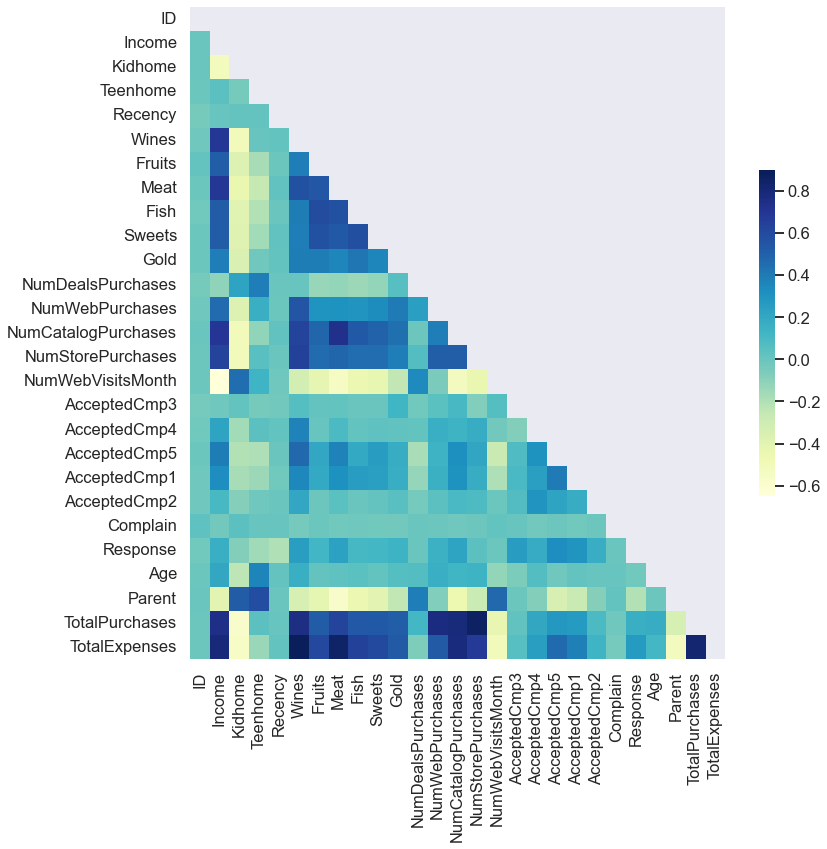

In [54]:
plt.figure(figsize=(12,12))
sns.set_context('talk')
#cmap = sns.light_palette('green')

mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlations, 
            cmap='YlGnBu',
            vmax=.9, 
            mask = mask,
            cbar_kws={'shrink': 0.5})

### Observations:

It appears their are some correlations, for example Income and TotalExpenses, TotalPurchases.

Also some correlations between certain items.

Another correlation is Meats to total expenses, not surprised as meat cost alot, makes me think of the price of hamburg right now.

### Visualizing of data 

Countplot of Married_Statues with a hue of Education


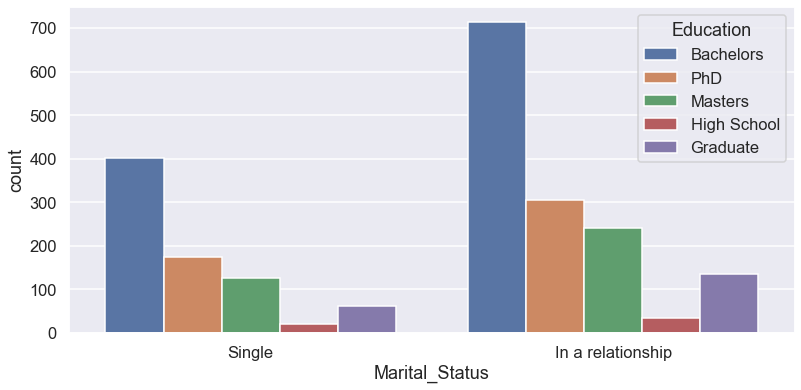

In [55]:
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.countplot(x='Marital_Status',hue='Education', data=df)

print('Countplot of Married_Statues with a hue of Education')

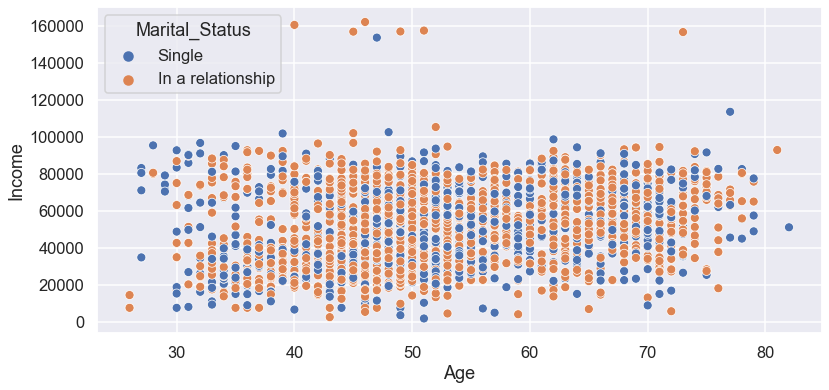

In [56]:
# Scatter plot with Age and Income, hue of relationship status
sns.set_context('talk')
plt.figure(figsize=(13,6))
ax = sns.scatterplot(data=df, x='Age', y='Income', hue='Marital_Status')

Not much of any correlation between Income and Age.

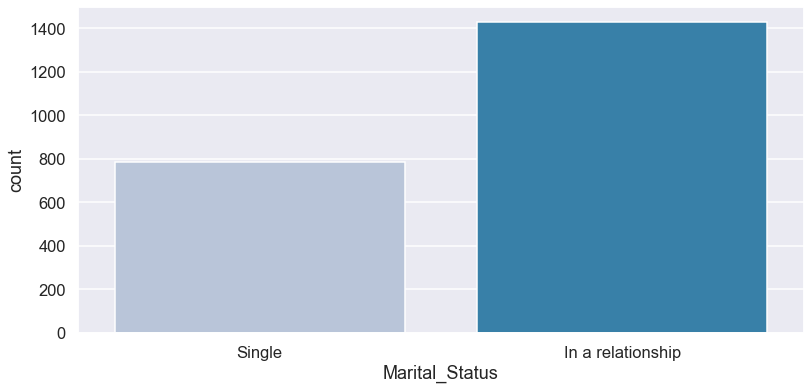

In [57]:
# Countplot of Single or In a relationship
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.countplot(x='Marital_Status',data=df, palette='PuBu')
plt.show()

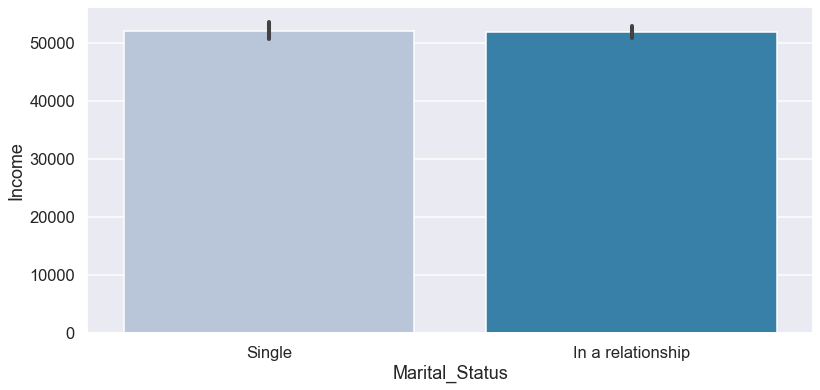

In [58]:
# Barplot to represent income to martial status
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.barplot(x='Marital_Status', y='Income', data=df, palette='PuBu')
plt.show()

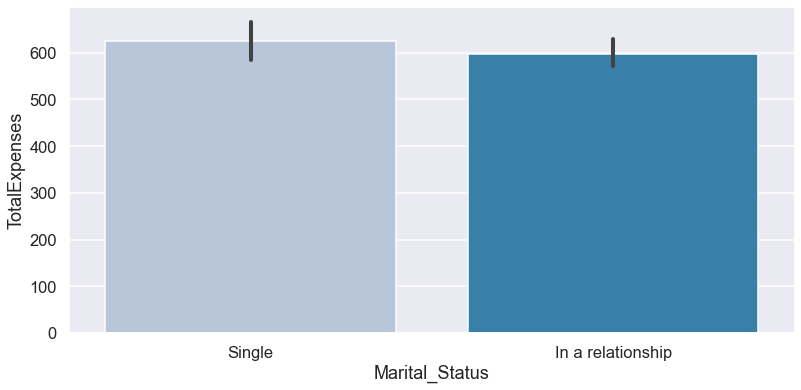

In [59]:
# Barplot to represent marital_status to totalexpenses
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.barplot(x='Marital_Status', y='TotalExpenses', data=df, palette='PuBu')
plt.show()

The two charts above tell us that marital_status has no major correlation between income and spending at the store. Which means we can drop it when we create our model, kinda surprised we ended being able to drop this column.

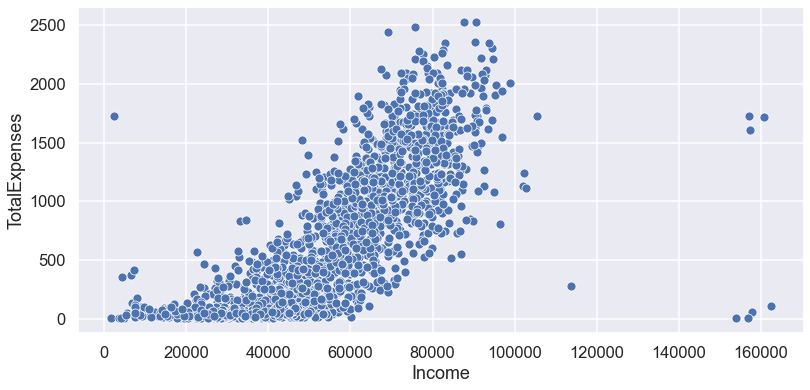

In [60]:
# Scatter plot with Income vs Total Expenses
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.scatterplot(data=df, x='Income', y='TotalExpenses')
plt.show()

Clearly there is a major correlation between how much money a customer makes and how much they have spent.

Parent and non parents count


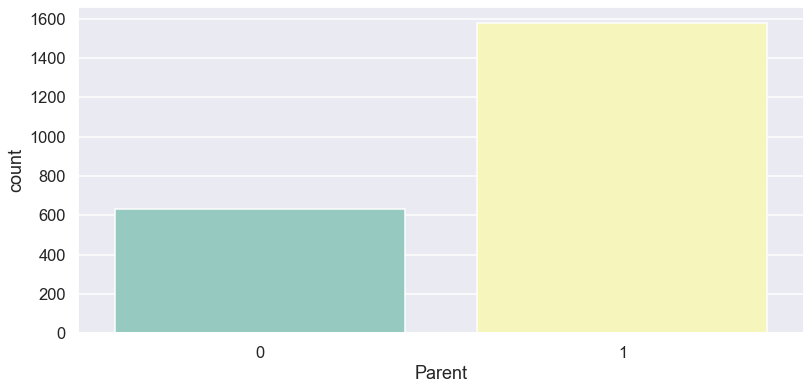

In [61]:
# Parent vs Non Parents
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.countplot(x="Parent", data=df, palette='Set3')
print("Parent and non parents count")

Slightly over 600 are not parents while almost 1600 people are parents of at least one child

In [62]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases,TotalExpenses
0,5524,1957,Bachelors,Single,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,22,1617
1,2174,1954,Bachelors,Single,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,1,4,27
2,4141,1965,Bachelors,In a relationship,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,20,776
3,6182,1984,Bachelors,In a relationship,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,6,53
4,5324,1981,PhD,In a relationship,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,14,422


Total spend if parent or not a parent


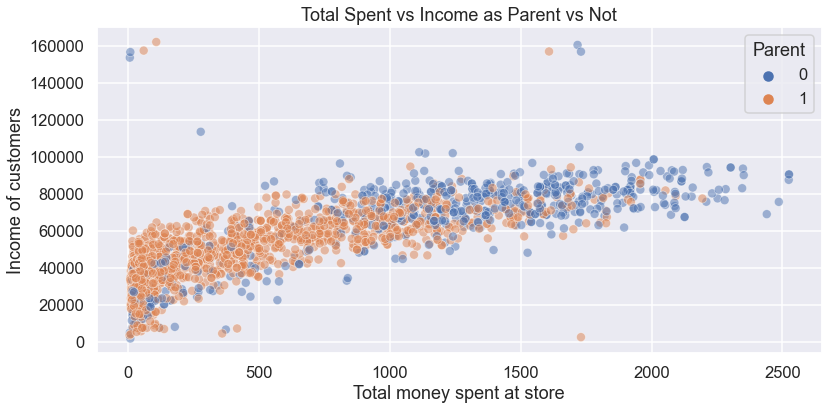

In [63]:
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.scatterplot(data=df, x='TotalExpenses', 
                         y='Income', 
                         sizes="pop", 
                         hue='Parent',
                         alpha=0.5)

plt.xlabel('Total money spent at store')
plt.ylabel('Income of customers')
plt.title('Total Spent vs Income as Parent vs Not')
print("Total spend if parent or not a parent")

**Remarks**

   - I find this interesting as there are clearly less parents. It appears that according to this data that non parents have spent more total at the store.

Plot Education column


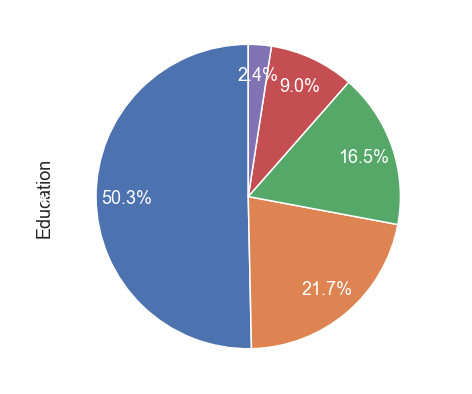

In [64]:
sns.set_context('talk')
plot = eduPlot.plot.pie(autopct='%1.1f%%',pctdistance=0.8,startangle=90,
                              figsize=(12,7), textprops={'color':"w"})

print("Plot Education column")

In [65]:
# Make another copy of the data
data_df = df.copy()

## Clustering

In [67]:
# Review of our data currently
data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases,TotalExpenses
0,5524,1957,Bachelors,Single,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,22,1617
1,2174,1954,Bachelors,Single,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,1,4,27
2,4141,1965,Bachelors,In a relationship,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,20,776
3,6182,1984,Bachelors,In a relationship,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,6,53
4,5324,1981,PhD,In a relationship,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,14,422


In [68]:
# Dropping columns that will not give value to the segmentation
drop = ['ID','Year_Birth', 'Dt_Customer', 'Wines', 'Fruits', 'Meat',
        'Fish', 'Sweets', 'Gold', 'AcceptedCmp1', 'AcceptedCmp2',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Marital_Status']

In [69]:
# Finalize the columns dropping
data_df.drop(columns=drop, axis=1, inplace=True)

In [70]:
# Viewing the updated size of the dataset
data_df.shape

(2212, 14)

#### Using Labelencoder to convert categorical data


Need to transform 'Education' from categorical to numeric data type.
Sklearn library has a tool called LabelEncoder to help with this.

In [71]:
label_encoder = LabelEncoder()

In [72]:
# Transform Education to numeric
data_df['Education'] = label_encoder.fit_transform(data_df['Education'])

### Normalizing the data

Normalization: Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges

##### Using the 'StandardScaler' function will perform normalization over the dataset

In [73]:
x = data_df.values
x = np.nan_to_num(x)

In [74]:
sc = StandardScaler()

In [75]:
cluster = sc.fit_transform(x)
print('Samples of customer data: ', cluster[:3])

Samples of customer data:  [[-0.88312891  0.28710487 -0.82275354 -0.92969866  0.31035323  0.35102992
   1.42686452  2.50360729 -0.55581429  0.69218052  1.01835202 -1.58113883
   1.30946091  1.67624537]
 [-0.88312891 -0.26088203  1.04002111  0.90809708 -0.38081349 -0.16870113
  -1.12641992 -0.57133959 -1.17116024 -0.13254521  1.27478522  0.63245553
  -1.18922094 -0.96329696]
 [-0.88312891  0.9131964  -0.82275354 -0.92969866 -0.79551352 -0.68843217
   1.42686452 -0.22967882  1.29022356 -0.54490807  0.33453017 -1.58113883
   1.03182959  0.28011009]]


### Selecting the number of cluster

#### WCSS

In [76]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [77]:
wcss

[1025434877226.0317,
 319215162264.70917,
 183128111109.11682,
 122355559551.02654,
 81066818546.51152,
 53571830072.26245,
 40598635596.39917,
 31081035364.576923,
 23860372127.28965,
 19016924565.014732]

### The Elbow Method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.


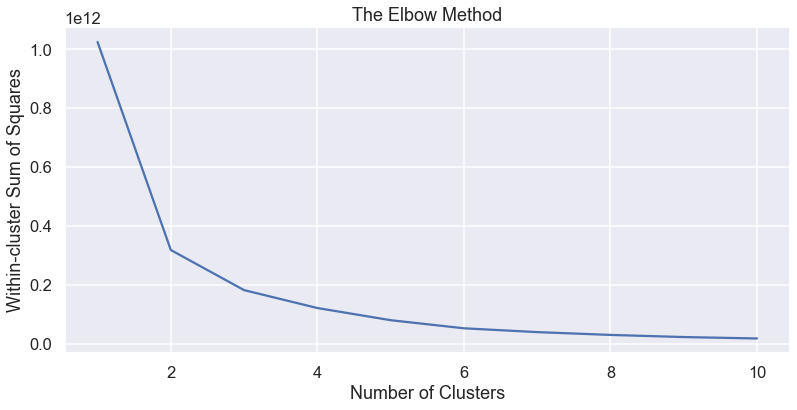

In [78]:
plt.figure(figsize=(13,6))
number_clusters = range(1, 11)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
print("In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.")

<code style="background:yellow;color:black">Perform clustering to summarize customer segments.</code>

## Model: With KMeans Algorithm

In [79]:
# Defining the number of clusters
clusters = 3

model = KMeans(init = 'k-means++',
              n_clusters = clusters,
              n_init= 12)

model.fit(x)
labels = model.labels_

In [80]:
data_df['ClusterNum'] = labels

This created a new attribute 'Cluster_Num' in the dataset. Which represents which cluster each row belongs too.

In [81]:
# Check out the mean values of new attribute
data_df.groupby('ClusterNum').mean()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Parent,TotalPurchases,TotalExpenses
ClusterNum,,,,,,,,,,,,,,
0,1.663265,52410.118622,0.405612,0.822704,49.475765,3.121173,4.766582,2.269133,6.105867,5.709184,55.936224,0.886480,13.141582,500.896684
1,1.340970,28369.243935,0.808625,0.314016,48.521563,2.142857,2.159030,0.526954,3.083558,6.911051,48.799191,0.845013,5.769542,95.029650
2,1.489796,76958.275510,0.086006,0.351312,49.036443,1.610787,5.399417,5.453353,8.409621,3.158892,54.466472,0.376093,19.262391,1282.889213


In [83]:
# Copy of data_df now its scaled
scaled_df = data_df.copy()

# Aiming for 3 cluster
kmeans = KMeans(3)
# Fit the data
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [84]:
# Create copy of scaled_df
cluster_df = scaled_df.copy()
# Taking note of the predited cluster 
cluster_df['ClusterNum'] = kmeans.fit_predict(scaled_df)
cluster_df['ClusterNum '] = kmeans.labels_

Scatter plot between Income and Total Expenses features.


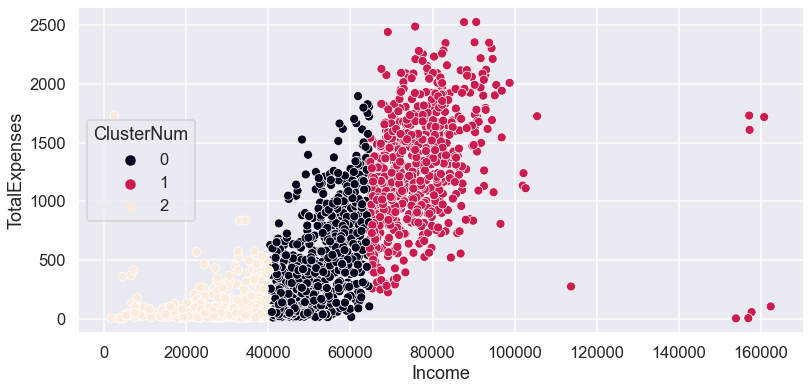

In [86]:
# Ploting the data using two features.
plt.figure(figsize=(13,6))
sns.scatterplot(x='Income', y='TotalExpenses',
                data=cluster_df,
                hue='ClusterNum',
                palette='rocket')
print("Scatter plot between Income and Total Expenses features.")

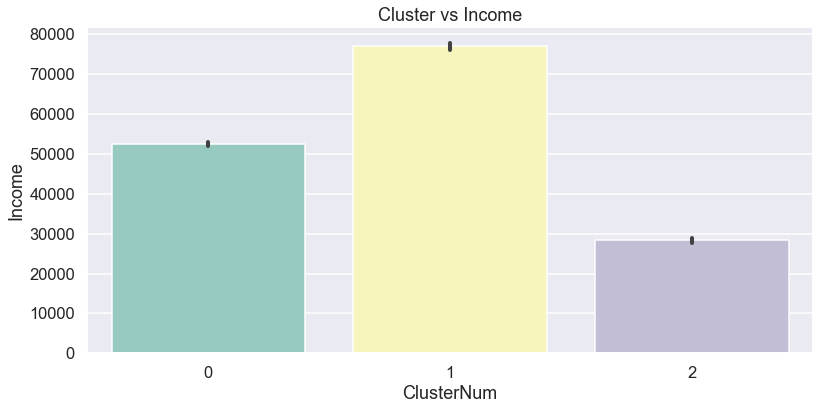

In [87]:
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.barplot(x=cluster_df['ClusterNum'], y=cluster_df['Income'], palette='Set3')
plt.title("Cluster vs Income", size=18)
plt.show()

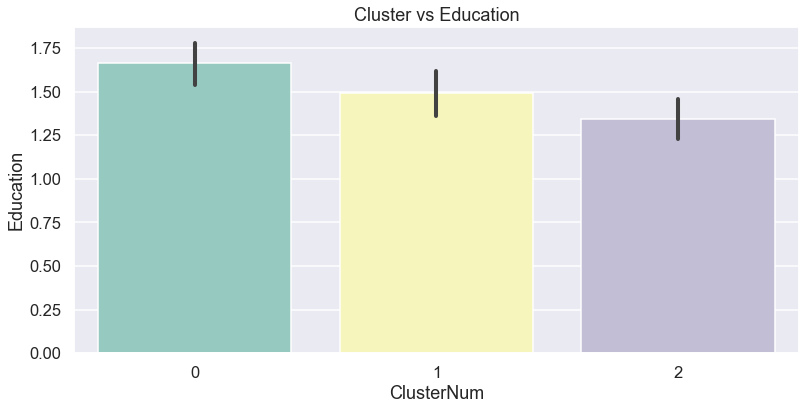

In [88]:
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.barplot(x=cluster_df['ClusterNum'], y=cluster_df['Education'], palette='Set3')
plt.title("Cluster vs Education", size=18)
plt.show()

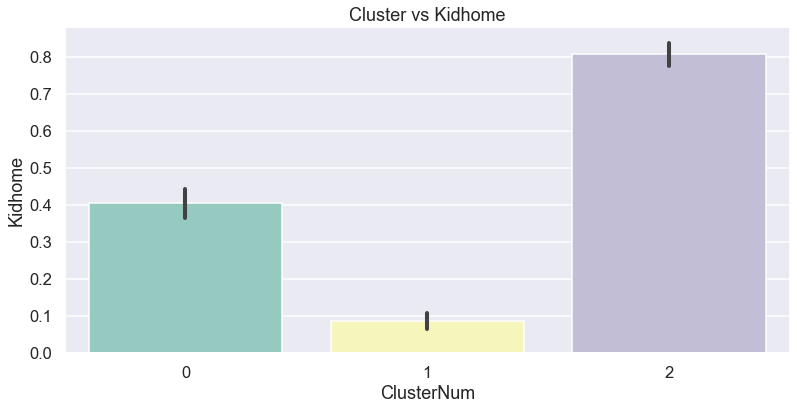

In [89]:
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.barplot(x=cluster_df['ClusterNum'], y=cluster_df['Kidhome'], palette='Set3')
plt.title("Cluster vs Kidhome", size=18)
plt.show()

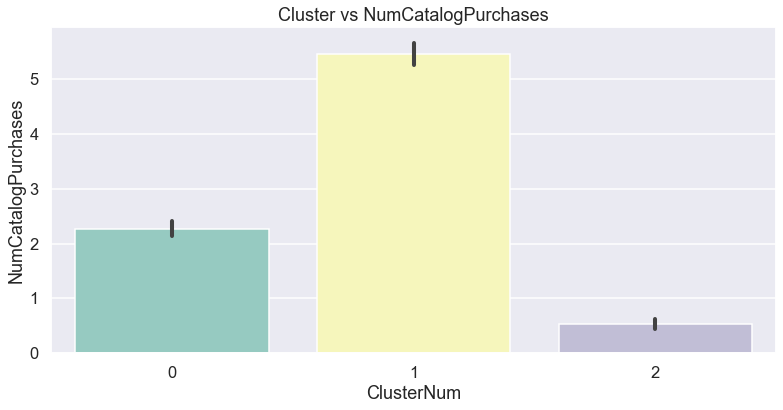

Income with Number of catalog purchases, can also see a slight trend here as well


In [90]:
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.barplot(x=cluster_df['ClusterNum'], y=cluster_df['NumCatalogPurchases'], palette='Set3')
plt.title("Cluster vs NumCatalogPurchases", size=18)
plt.show()
print("Income with Number of catalog purchases, can also see a slight trend here as well")

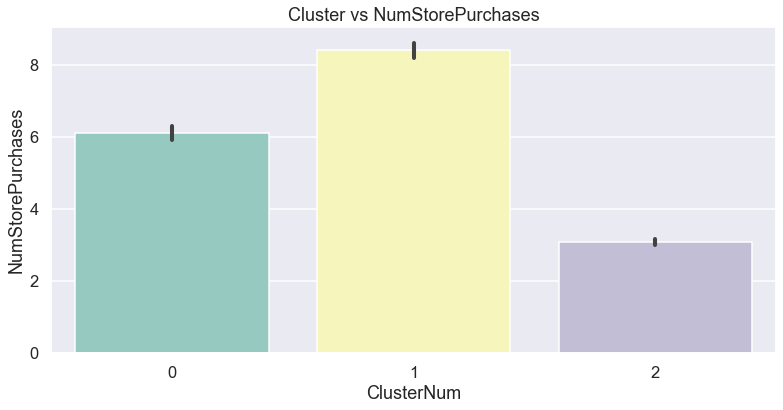

Income with Number of purchases in the store, the higer the income the more purchases.


In [91]:
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.barplot(x=cluster_df['ClusterNum'], y=cluster_df['NumStorePurchases'], palette='Set3')
plt.title("Cluster vs NumStorePurchases", size=18)
plt.show()
print("Income with Number of purchases in the store, the higer the income the more purchases.")

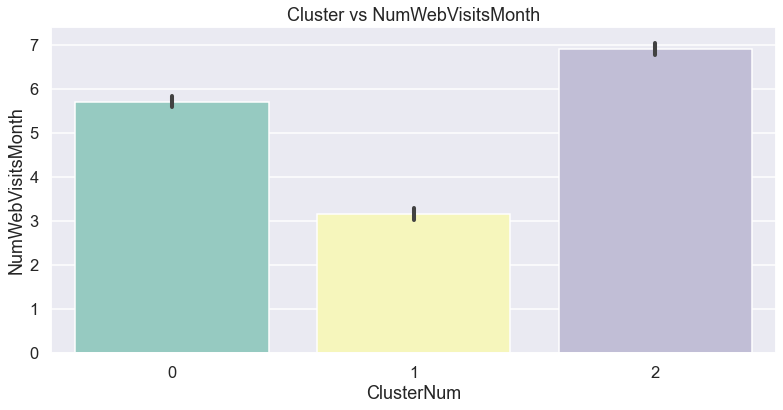

Plot Income and Number of Web Site Visits (per month).


In [92]:
sns.set_context('talk')
plt.figure(figsize=(13,6))
sns.barplot(x=cluster_df['ClusterNum'], y=cluster_df['NumWebVisitsMonth'], palette='Set3')
plt.title("Cluster vs NumWebVisitsMonth", size=18)
plt.show()
print("Plot Income and Number of Web Site Visits (per month).")

## Profiling

##### Create a 3D scatter to help profile our clusters

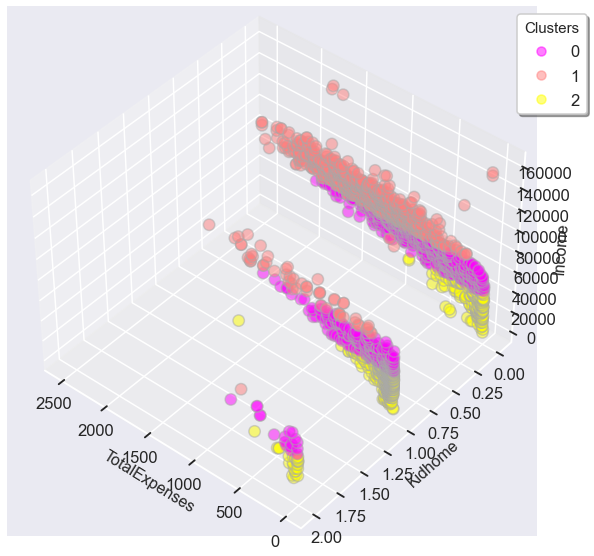

In [93]:
fig = plt.figure(figsize=(8,8))
fig = plt.figure(1)
plt.clf()

ax = Axes3D(fig,
           rect = [0, 0, 0.92, .98],
           elev = 42,
           azim = 130)
plt.cla()
sc = ax.scatter(cluster_df['TotalExpenses'],cluster_df['Kidhome'], cluster_df['Income'],
                      c=cluster_df['ClusterNum'],
                      s=130,
                      cmap='spring',
                      alpha=0.5,
                      edgecolor='darkgrey')
ax.set_xlabel('TotalExpenses', fontsize=16)
ax.set_ylabel('Kidhome', fontsize=16)
ax.set_zlabel('Income', fontsize=16)
plt.legend(*sc.legend_elements(),
                  bbox_to_anchor = (1.11, 1),
                  title='Clusters',
                  title_fontsize = 15,
                  shadow=True,
                  facecolor = 'white')
plt.show()

In [94]:
# Add cluster labels
profile_overall = cluster_df.describe().T

In [95]:
# Use mean, summarize the data
profile_overall['Overall Dataset'] = profile_overall[['mean']]
profile_overall = profile_overall[['Overall Dataset']]

In [96]:
# Cluster ID levels
cluster_summary = cluster_df.groupby('ClusterNum').describe().T.reset_index()
cluster_summary = cluster_summary.rename(columns={'level_0':'Column', 'level_1':'Metric'})

In [97]:
cluster_summary.head()

ClusterNum,Column,Metric,0,1,2
0,Education,count,784.000000,686.000000,742.000000
1,Education,mean,1.663265,1.489796,1.340970
2,Education,std,1.752612,1.747335,1.582945
3,Education,min,0.000000,0.000000,0.000000
4,Education,25%,0.000000,0.000000,0.000000


In [98]:
# Summarizing each feature
cluster_summary = cluster_summary[cluster_summary['Metric'] == "mean"]
cluster_summary = cluster_summary.set_index('Column')

In [99]:
cluster_summary.head(20)

ClusterNum,Metric,0,1,2
Column,,,,
Education,mean,1.663265,1.489796,1.340970
Income,mean,52410.118622,76958.275510,28369.243935
Kidhome,mean,0.405612,0.086006,0.808625
Teenhome,mean,0.822704,0.351312,0.314016
Recency,mean,49.475765,49.036443,48.521563
NumDealsPurchases,mean,3.121173,1.610787,2.142857
NumWebPurchases,mean,4.766582,5.399417,2.159030
NumCatalogPurchases,mean,2.269133,5.453353,0.526954
NumStorePurchases,mean,6.105867,8.409621,3.083558


## Summary

Reviewing the data it does say there is a correlation between having an higher education with having a higher income, which isn't all that surprising. People making more money spent more at the store, again, thats expected. Its interested that the highest income, cluster 1 has the highest average for Web Purchases, but the smallest for Web site visits, apparently the lesser income groups do more window shopping. 

Highest Income cluster is also the cluster thats tends to not have any children, also the group to have spent the most at the store. 

### WORK IN PROGRESS